In [ ]:
# Importação das bibliotecas necessárias para manipulação de dados, visualização e avaliação de modelos
import numpy as np
import matplotlib.pyplot as plt
import gc
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pandas as pd
#from tabulate import tabulate
from IPython.display import display

In [ ]:
# Caminho para o diretório contendo os dados tratados e os modelos treinados
file_path = "../input/auteth-intrusion-dataset-treated"

In [ ]:
# Carregamento dos dados de teste (X: características, y: rótulos)
# Substitua os nomes dos arquivos pelos caminhos corretos, se necessário
X = np.load(f'{file_path}/x_outdoor_packets_agg.npz')['arr_0']
y = np.load(f'{file_path}/y_outdoor_label_agg.npz')['arr_0']

In [ ]:
# Função para avaliar um modelo específico com base no índice fornecido
def avaliacao_modelo(val):
    model_index = int(val)
    
    # Carrega o modelo treinado correspondente ao índice
    model = load_model(f'{file_path}/model_{val}.keras')
    
    # Avalia o modelo nos dados de teste (loss e accuracy)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    
    # Gera predições para os dados de teste
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calcula métricas de avaliação: precisão e recall
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    # Calcula a curva ROC e a área sob a curva (AUC)
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Salva as métricas em um arquivo CSV para o modelo avaliado
    df_metrics = pd.DataFrame([{
        'model': model_index,
        'loss': loss,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'auc': roc_auc
    }])
    df_metrics.to_csv(f'metrics_model_{model_index}.csv', index=False)
    
    # Salva os dados da curva ROC para uso posterior
    df_roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    df_roc.to_csv(f'roc_model_{model_index}.csv', index=False)
    
    print(f"Modelo {model_index} processado e resultados salvos.")
    
    # Libera a memória para evitar problemas de RAM
    del model, y_pred, y_pred_prob, fpr, tpr
    K.clear_session()
    gc.collect()

In [ ]:
# Avaliação do modelo 0
avaliacao_modelo(0)

58453/58453 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step
Modelo 0 processado e resultados salvos.


In [ ]:
# Avaliação do modelo 1
avaliacao_modelo(1)

58453/58453 ━━━━━━━━━━━━━━━━━━━━ 77s 1ms/step
Modelo 1 processado e resultados salvos.


In [ ]:
# Avaliação do modelo 2
avaliacao_modelo(2)

58453/58453 ━━━━━━━━━━━━━━━━━━━━ 75s 1ms/step
Modelo 2 processado e resultados salvos.


In [ ]:
# Avaliação do modelo 3
avaliacao_modelo(3)

58453/58453 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step
Modelo 3 processado e resultados salvos.


In [ ]:
# Avaliação do modelo 4
avaliacao_modelo(4)

58453/58453 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step
Modelo 4 processado e resultados salvos.


Métricas consolidadas salvas em 'metricas_modelos_final.csv'.


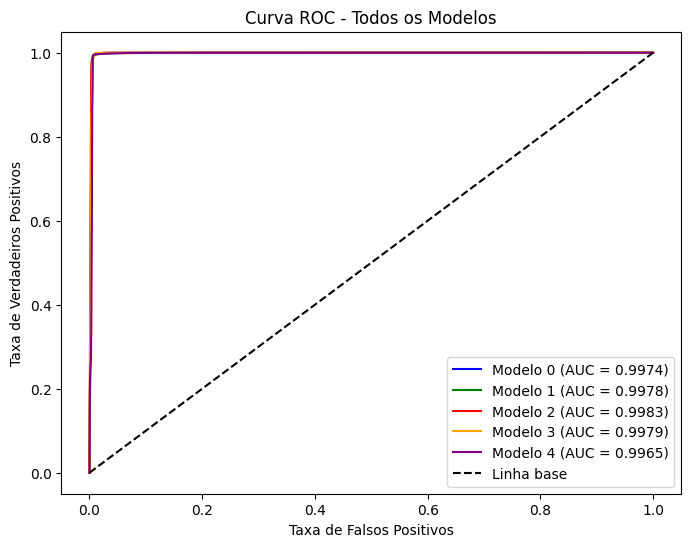

In [ ]:
# Consolidação das métricas de todos os modelos em um único arquivo CSV
metrics_files = glob.glob('metrics_model_*.csv')
df_list = [pd.read_csv(f) for f in metrics_files]
df_metrics = pd.concat(df_list, ignore_index=True)
df_metrics.to_csv('metricas_modelos_final.csv', index=False)
print("Métricas consolidadas salvas em 'metricas_modelos_final.csv'.")

# Criação do gráfico das curvas ROC para todos os modelos
plt.figure(figsize=(8, 6))
cores = ['blue', 'green', 'red', 'orange', 'purple']

for i in range(5):
    roc_file = f'roc_model_{i}.csv'
    try:
        # Carrega os dados da curva ROC do modelo i
        df_roc = pd.read_csv(roc_file)
        # Obtém o valor de AUC do DataFrame consolidado
        auc_val = df_metrics.loc[df_metrics['model'] == i, 'auc'].values[0]
        plt.plot(df_roc['fpr'], df_roc['tpr'], color=cores[i % len(cores)],
                 label=f'Modelo {i} (AUC = {auc_val:.4f})')
    except FileNotFoundError:
        print(f"Arquivo {roc_file} não encontrado.")

# Configurações finais do gráfico
plt.plot([0, 1], [0, 1], 'k--', label='Linha base')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Todos os Modelos')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Leitura e exibição do arquivo consolidado de métricas
df_metrics = pd.read_csv('metricas_modelos_final.csv')
display(df_metrics)

,model,loss,accuracy,precision,recall,auc
0,1,0.109973,0.991629,0.966234,0.993089,0.997807
1,3,0.081059,0.992142,0.965631,0.996399,0.997862
2,2,0.097194,0.990164,0.954829,0.998326,0.998348
3,0,0.187429,0.984612,0.929957,0.998716,0.997378
4,4,0.085972,0.992981,0.971187,0.994615,0.996490
